<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Project1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | /2                    |
| 2: Data Prep            | /2                    |
| 3: Research             | /10                   |
| 4: Analysis             | /10                   |
| 5: Bumps in the Road.   | /1                    |
| Total                   | /25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

For Project 1 I plan to use the machine learning algoritms we learned on the addmitted student data set. With these I will see which factors are most important to univerisities when accepting a prospective student. Because this application process can be stressful I want to be able to show what aspects are important as well as give a good estimate based on the algorithm to see if a student would be accepted or not given their statistics.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

First step is to import my drive and upload the data set

In [86]:
# load and preapre your data here:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
path = '/content/drive/MyDrive/datasets/adm-data.csv' 
admData = pd.read_csv(path) 
admData.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The next step is to check if there is any data that is nan and would need to be removed

In [87]:
admData.isna().any()


Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

Since there is no NA values all being false and all values are numeric we can start to normalize the data.

In [219]:
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
#This is selecting which values I want to be my predictors and which one I want to be my target variable
target = 'Chance of Admit '
predictors = admData.columns.drop(target, 'Serial No.')
train_data, test_data, train_sln, test_sln = train_test_split(admData[predictors], admData[target])

#Next step is to normalize the data to not have values such as GRE and TOEFL scores outweigh other values in the dataset
#Normalize both the train and test data keep solutions unnormalized
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

array([[-1.2730201 , -0.47539594, -1.28829519, ...,  0.02967321,
        -1.23297259,  0.85679872],
       [-0.86821625,  1.2129261 ,  2.08567737, ...,  0.58604599,
         0.57478841,  0.85679872],
       [-0.37541157,  0.59091271, -0.44480205, ...,  0.58604599,
         0.21664708, -1.16713526],
       ...,
       [-0.15540948, -0.74197311,  0.06129383, ..., -0.52669956,
        -0.85777691, -1.16713526],
       [-1.16741909, -0.20881878, -0.10740479, ..., -0.52669956,
        -0.20971165,  0.85679872],
       [ 0.1789937 ,  0.4131946 ,  0.73608834, ...,  1.14241877,
         1.08641889,  0.85679872]])

# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__ 

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data. 

For each of the above models, you need to include a __graph of at least 1 tuned parameter__. 


In [220]:
# code goes here... don't forget to include graphs. Professor Moore loves graphs.
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=5)

knn.fit(train_data, train_sln)

preds = knn.predict(test_data)
# use a metric to see how good our predictions are
print("R2: ", metrics.r2_score(test_sln, preds))
print("MAE: ", metrics.mean_absolute_error(test_sln, preds))
print("MSE: ", metrics.mean_squared_error(test_sln, preds))


#Using normization on KNN
knn2= neighbors.KNeighborsRegressor(n_neighbors=13)

knn2.fit(train_data_normalized, train_sln)

knn2preds = knn2.predict(test_data_normalized)
# use a metric to see how good our predictions are
print("R2: ", metrics.r2_score(test_sln, knn2preds))
print("MAE: ", metrics.mean_absolute_error(test_sln, knn2preds))
print("MSE: ", metrics.mean_squared_error(test_sln, knn2preds))

R2:  0.6740060085782312
MAE:  0.059000000000000025
MSE:  0.00615032
R2:  0.8134568336157912
MAE:  0.04450000000000001
MSE:  0.003519390532544379


In [216]:
wknn = neighbors.KNeighborsRegressor(n_neighbors=5, weights = 'distance')

# fit (train) the model to the data
wknn.fit(train_data, train_sln)

# use the trained model to get predictions from the normalized data
predict = knn.predict(test_data)
# use a metric to see how good our predictions are
print("R2: ", metrics.r2_score(test_sln, predict))
print("MAE: ", metrics.mean_absolute_error(test_sln, predict))
print("MSE: ", metrics.mean_squared_error(test_sln, predict))

R2:  0.6413439142204471
MAE:  0.06418999999999998
MSE:  0.007195569999999999


In [183]:
wknn2 = neighbors.KNeighborsRegressor(n_neighbors=9, weights = 'distance')

wknn2.fit(train_data_normalized, train_sln)

preds = wknn2.predict(test_data_normalized)
# use a metric to see how good our predictions are
print("R2: ", metrics.r2_score(test_sln, preds))
print("MAE: ", metrics.mean_absolute_error(test_sln, preds))
print("MSE: ", metrics.mean_squared_error(test_sln, preds))

R2:  0.7231660621566698
MAE:  0.0490711557126421
MSE:  0.0046665786168675035


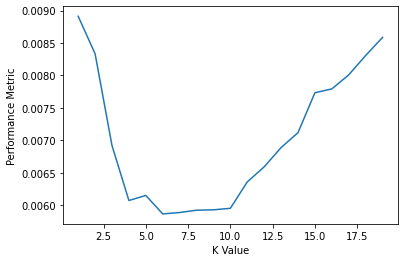

In [221]:
from sklearn.metrics import mean_squared_error

# Load the data into a Pandas DataFrame
data = admData

# Create a range of k values
k_values = np.arange(1, 20)

# Create an empty list to store the performance metric for each value of k
performance_metrics = []

# Iterate over each value of k and compute the performance metric
for k in k_values:
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(train_data, train_sln)
    y_pred = model.predict(test_data)
    performance_metric = mean_squared_error(test_sln, y_pred)
    performance_metrics.append(performance_metric)

# Plot the performance metric against the value of k
plt.plot(k_values, performance_metrics)
plt.xlabel('K Value')
plt.ylabel('Performance Metric')
plt.show()

Having a mean squared error closer to 0 is important so using a value between 5-10 is best in the case for KNN

Creating a decision tree for the data

In [186]:
#classic scikit-learn algorithm

#0. import libraries
from sklearn import tree
from sklearn import metrics

dt = tree.DecisionTreeRegressor(max_depth = 5, random_state = 3)

dt.fit(train_data,train_sln)

admit_predictions = dt.predict(test_data)

print("Unnormalized data results")
print("R2: ", metrics.r2_score(test_sln, admit_predictions))
print("MAE: ", metrics.mean_absolute_error(test_sln, admit_predictions))
print("MSE: ", metrics.mean_squared_error(test_sln, admit_predictions))

Unnormalized data results
R2:  0.6635550475183021
MAE:  0.05309433359429229
MSE:  0.005671439106185881


In [185]:
dt2 = tree.DecisionTreeRegressor(max_depth = 5, random_state = 5)

dt2.fit(train_data_normalized, train_sln)

admit_preds = dt2.predict(test_data_normalized)

print("Normalized data results")
print("R2: ", metrics.r2_score(test_sln, admit_preds))
print("MAE: ", metrics.mean_absolute_error(test_sln, admit_preds))
print("MSE: ", metrics.mean_squared_error(test_sln, admit_preds))



Normalized data results
R2:  0.6635550475183023
MAE:  0.05309433359429229
MSE:  0.005671439106185878


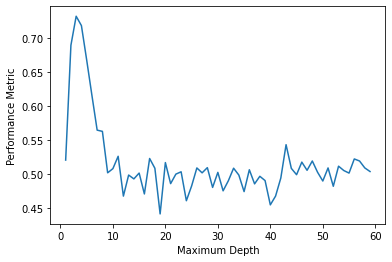

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Load the data into a Pandas DataFrame
data = admData

# Separate the target variable from the features
target = 'Chance of Admit '
predictors = admData.columns.drop(target, 'Serial No.')
train_data, test_data, train_sln, test_sln = train_test_split(admData[predictors], admData[target])

# Create a range of maximum depth values
max_depths = np.arange(1, 60)

# Create an empty list to store the performance metric for each value of maximum depth
performance_metrics = []

# Iterate over each value of maximum depth and compute the performance metric
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(train_data, train_sln)
    y_pred = model.predict(test_data)
    performance_metric = metrics.r2_score(test_sln, y_pred)
    performance_metrics.append(performance_metric)

# Plot the performance metric against the maximum depth
plt.plot(max_depths, performance_metrics)
plt.xlabel('Maximum Depth')
plt.ylabel('Performance Metric')
plt.show()

With this graph it shows that there is a best option of using 5 as the max depth

Next using radnom forests

In [174]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=50)
forest.fit(train_data, train_sln)
admpreds = forest.predict(test_data)

print("R2: ", metrics.r2_score(test_sln, admpreds))
print("MAE: ", metrics.mean_absolute_error(test_sln, admpreds))
print("MSE: ", metrics.mean_squared_error(test_sln, admpreds))


forest2 = RandomForestRegressor(n_estimators=60)
forest2.fit(train_data_normalized, train_sln)
admpred = forest2.predict(test_data_normalized)

print("R2: ", metrics.r2_score(test_sln, admpred))
print("MAE: ", metrics.mean_absolute_error(test_sln, admpred))
print("MSE: ", metrics.mean_squared_error(test_sln, admpred))

R2:  0.8233988744733715
MAE:  0.04662200000000004
MSE:  0.0041871756000000015
R2:  0.817236853074897
MAE:  0.04741500000000002
MSE:  0.004333275833333336


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


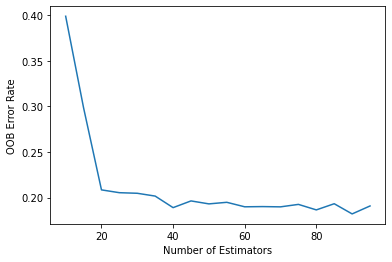

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load the data into a Pandas DataFrame
data = admData

# Separate the target variable from the features
X = data.drop(target, axis=1)
y = data[target]

# Create a range of n_estimators values
n_estimators = np.arange(10, 100, 5)

# Create an empty list to store the OOB error rate for each value of n_estimators
oob_error_rates = []

# Iterate over each value of n_estimators and calculate the OOB error rate
for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, oob_score=True)
    model.fit(X, y)
    oob_error_rate = 1 - model.oob_score_
    oob_error_rates.append(oob_error_rate)

# Plot the OOB error rate against the number of estimators
plt.plot(n_estimators, oob_error_rates)
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Error Rate')
plt.show()

This states that any value estimators greater than 20 will give a good bet for similar good results

Now we can look at what are the best predictors for the data

In [179]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=2)
selector.fit(train_data,train_sln)

# bigger number means the feature is more important
print('Here are the scores of each feature:')
print(selector.scores_)
print(predictors)

Here are the scores of each feature:
[ 1.44152847 12.23561988 12.80631898  7.35302137  6.11488123  4.92977431
 20.59114336  3.42774077]
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |       R2=.68       |   R2=.77       |num neighbors        |
| w-kNN         |       R2=.68       |   R2=.81       |num numbers          |
| decision tree |       R2=.70       |   R2=.71     | Max depth            |
| random forest |       R2=.82       |   R2=.82      | n_estimators                    |

I discovered that when normalizing decision trees and forests the percent is very affected very little. When going down a tree it makes sense since it is not weighted and simply goes down the branches.

It was also proven that normalizing the data created a greater in K nearest neighbors. 

In my opinion the best is either a random forest or a weighted K Nearest Neighbor, with prefrence to wknn because the random forest varies from .76-.82 since it is random each time. 

I also found that the most important factors in these were CGPA, GRE Score (Graduate Aptitude test score), TOEFL score(test of english and foreign language), and University rating. These made sense to me and I was a little surprised about Letter of reccomendations not weighing in as much.  

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

First was importing the data it took me a couple tries and worked, next was seperating the data there was a hidden space after some columns names so it was harder to type those out.

Using code that was meant for classifiers on regressors caused me to also do some trouble shooting, I found my mistakes and was able to work them out to make the models work.

I also was having a difficult time with graphing for the models and used Scikit model my graph code after then putting in my data and variables. 